# BL.EN.U4AIE21138
# VALLURU SATEESH REDDY


# A1.Use numpy.fft.fft()to transform the speech signal to its spectral domain.
# Please plot the amplitude part of the spectral components and observe it.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


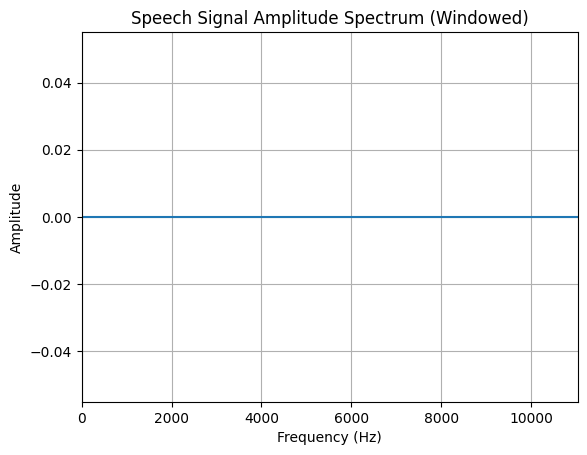

In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

filename = r"/content/drive/MyDrive/Words.mpeg"
y, sr = librosa.load(filename)

window_size = 1024      # Apply windowing (optional, reduces spectral leakage)
window = np.hanning(window_size)
y_windowed = y[:window_size] * window

# Calculate FFT
n = window_size  # Set FFT length for efficiency
spectral_data = np.fft.fft(y_windowed, n)

# Separate amplitude and phase
amplitudes = np.abs(spectral_data)

# Normalize amplitude (optional)
# amplitudes = 20 * np.log10(amplitudes / np.max(amplitudes))

# Calculate frequencies
frequencies = np.linspace(0, sr / 2, n // 2 + 1)  # Only positive frequencies

# Plot amplitude spectrum
plt.plot(frequencies, amplitudes[:n // 2 + 1])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Speech Signal Amplitude Spectrum (Windowed)")
plt.xlim(0, sr / 2)  # Limit to display range
plt.grid(True)
plt.show()

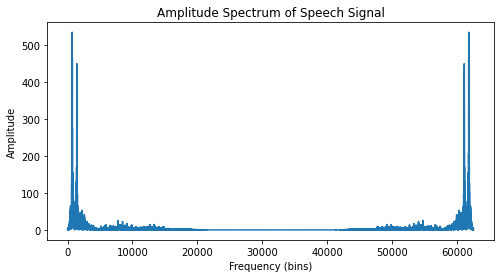

In [ ]:
#q1
Y = np.fft.fft(y)
amplitude = np.abs(Y)
plt.figure(figsize=(8, 4))
plt.plot(amplitude)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency (bins)')
plt.ylabel('Amplitude')

plt.show()

# A2. Use numpy.fft.ifft()to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal.

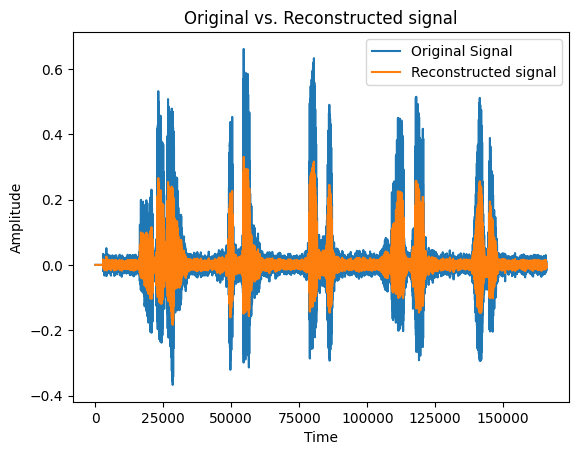

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the speech signal (using your preferred library)
signal, sample_rate = librosa.load(r"/content/drive/MyDrive/Words.mpeg")  # Replace with your file path

# Apply FFT
fft_result = np.fft.fft(signal)

# Inverse FFT (ifft expects the first half of the spectrum for real-valued inputs)
ifft_result = np.fft.ifft(fft_result[:len(fft_result)]/2)

# Reconstruct the real-valued time domain signal
reconstructed_signal = np.real(ifft_result)

# Compare the original and reconstructed signals
plt.plot(signal, label="Original Signal")
plt.plot(reconstructed_signal, label="Reconstructed signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Original vs. Reconstructed signal")
plt.show()



# or

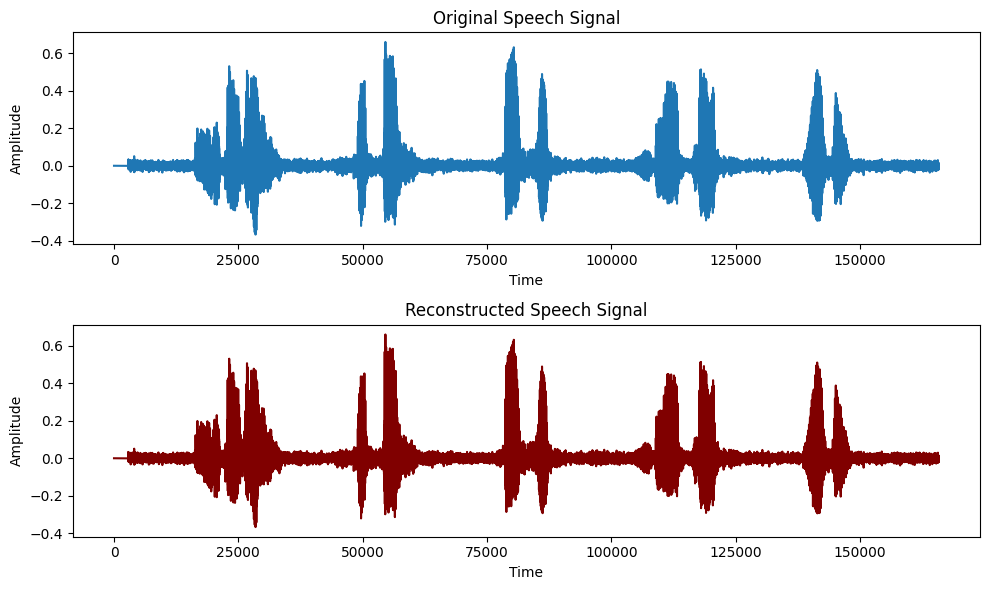

In [7]:
#Q2
Y = np.fft.fft(y)
reconstructed_signal = np.fft.ifft(Y)
plt.figure(figsize=(10, 6))

# Original signal
plt.subplot(2, 1, 1)
plt.plot(y, label='Original Signal')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Reconstructed signal
plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal, label='Reconstructed Signal', color='maroon')
plt.title('Reconstructed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.tight_layout()
plt.show()

# A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal.

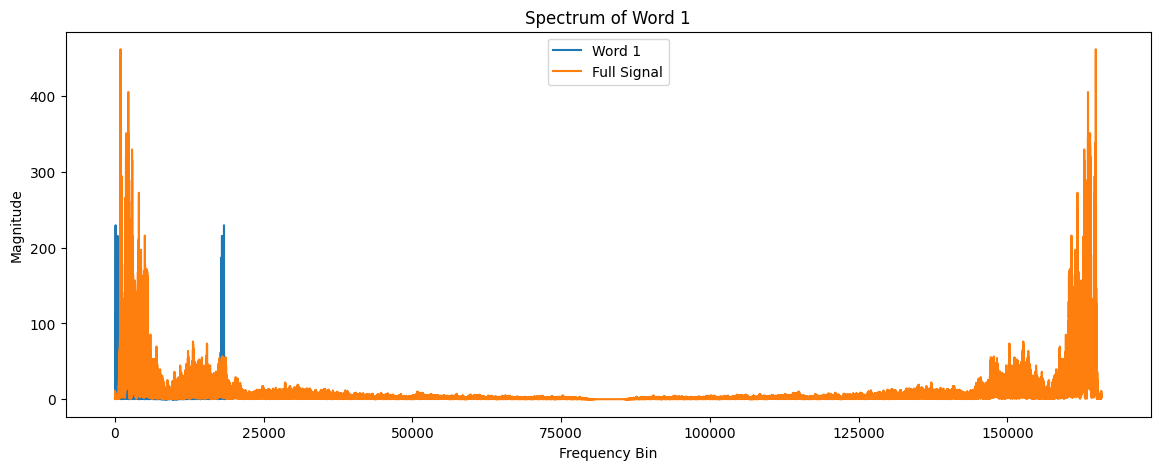

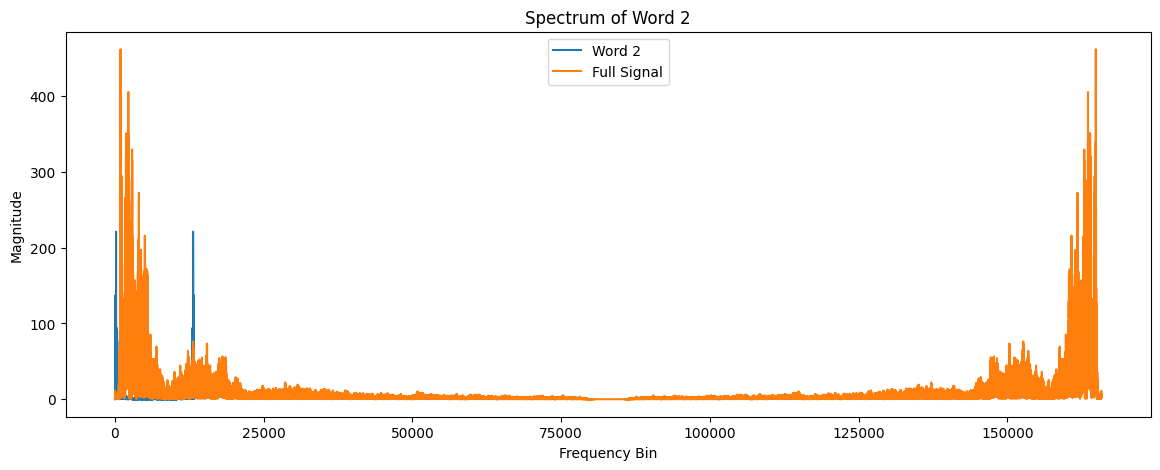

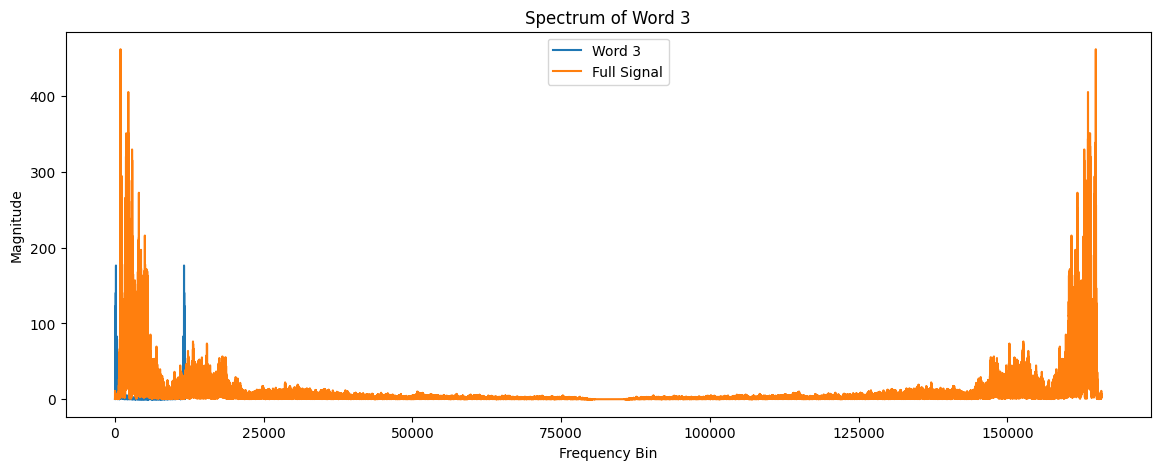

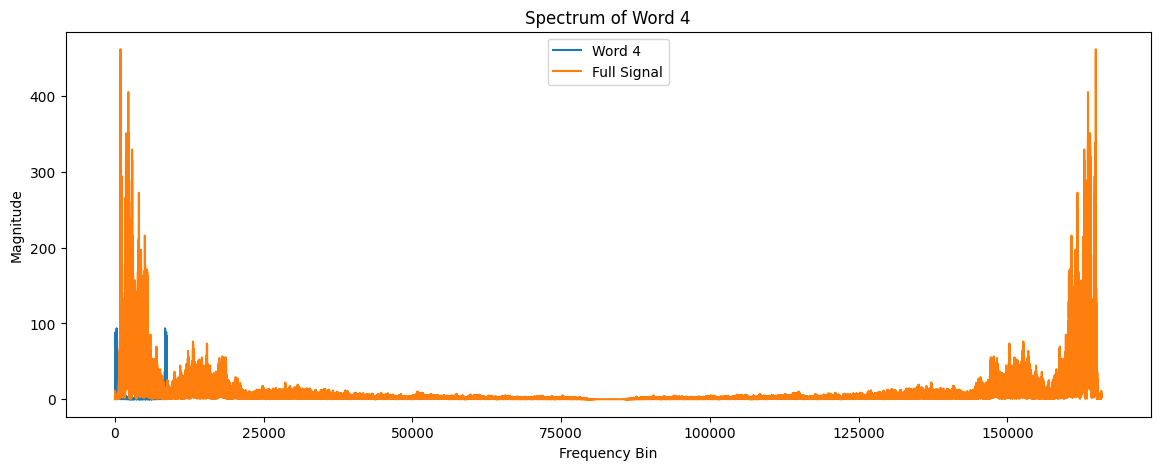

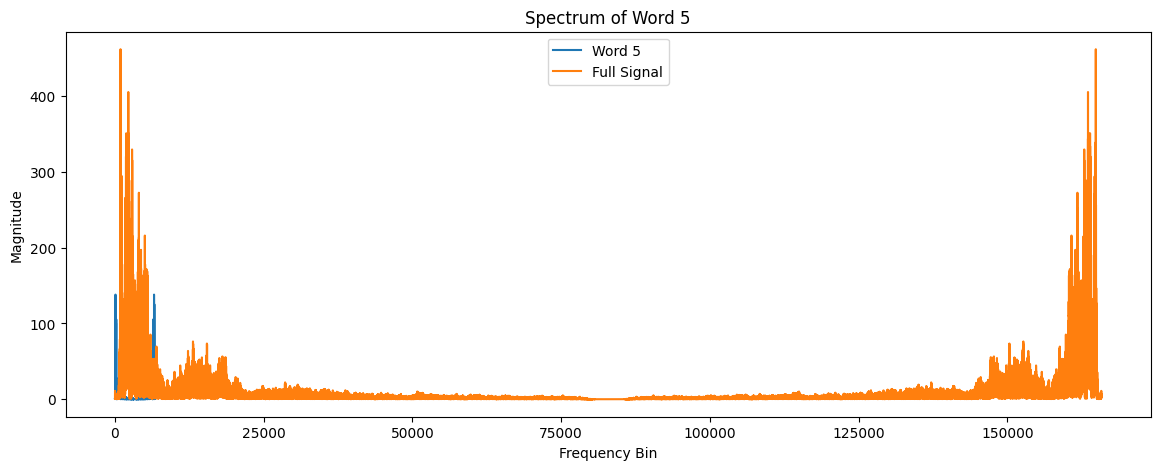

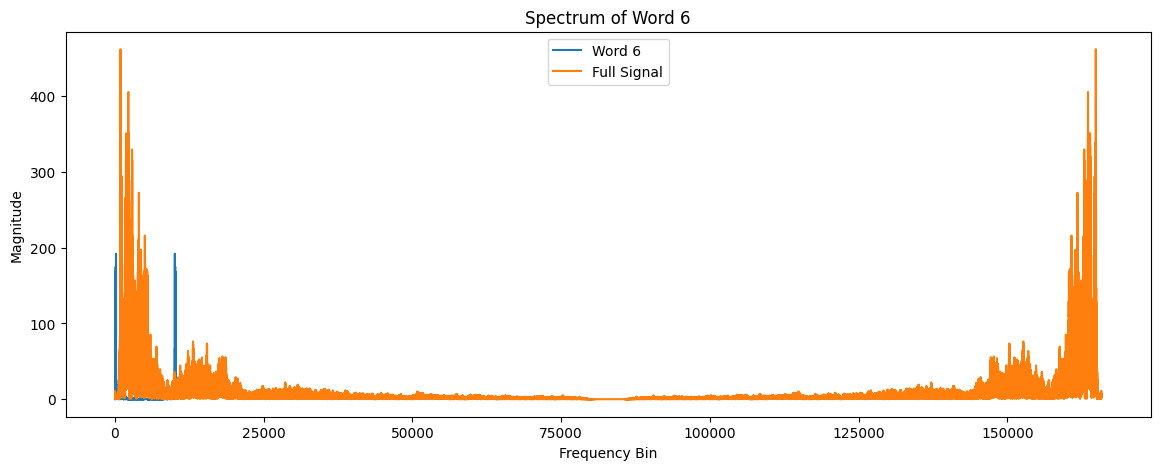

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

audio_file_path = r"/content/drive/MyDrive/Words.mpeg"
speech_signal, sample_rate = librosa.load(audio_file_path)

threshold = np.percentile(np.abs(speech_signal), 92)
segments = librosa.effects.split(speech_signal, top_db=-20 * np.log10(threshold))
for i, (start, end) in enumerate(segments):
    word = speech_signal[start:end]
    D_full = np.fft.fft(speech_signal)
    D_word = np.fft.fft(word)
    plt.figure(figsize=(14, 5))
    plt.plot(np.abs(D_word), label=f'Word {i+1}')
    plt.plot(np.abs(D_full), label='Full Signal')

    plt.title(f'Spectrum of Word {i+1}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()

# A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components.

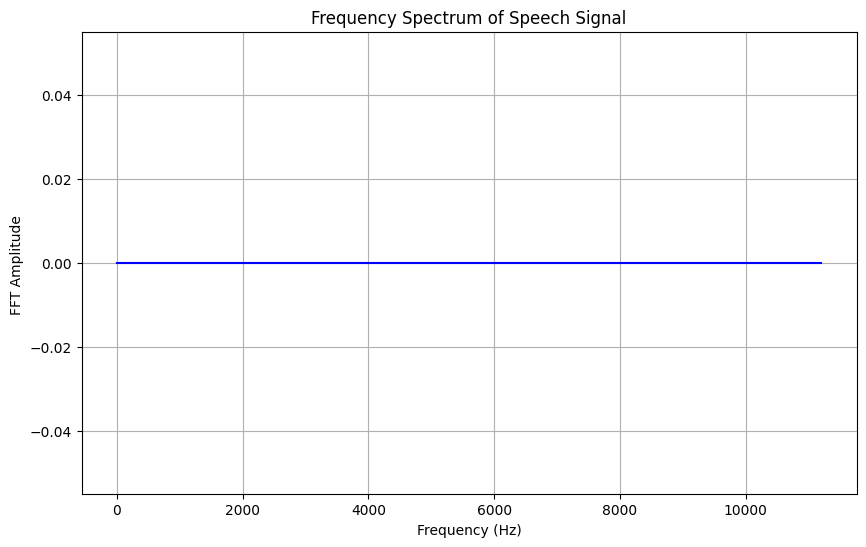

In [12]:
#Q4
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
sr=22500
window_duration = 0.02
window_samples = int(window_duration * sr)
windowed_signal = y[:window_samples]

# Compute the FFT
X = fft(windowed_signal)

# Get the one-sided spectrum
n_oneside = window_samples // 2
frequencies = np.arange(n_oneside) * (sr / window_samples)
spectrum = np.abs(X[:n_oneside])

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, spectrum, 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude ')
plt.title('Frequency Spectrum of Speech Signal')
plt.grid(True)
plt.show()

# A5. Break your speech signal into window lengths of 20 mSec intervals.Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix.You may use librosa.stft()or scipy.signal.stft()as well to achieve this.

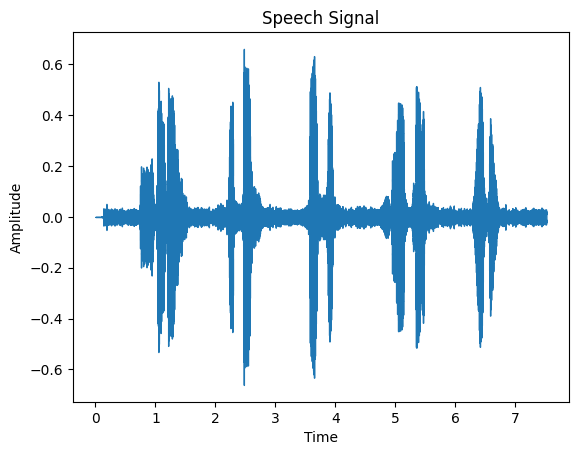

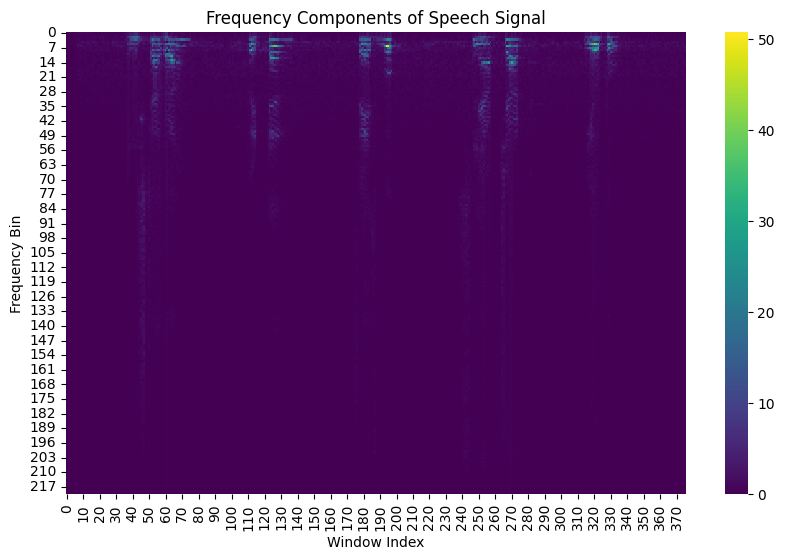

In [14]:
#Q5
import seaborn as sns
y, sr = librosa.load(r"/content/drive/MyDrive/Words.mpeg")
librosa.display.waveshow(y, sr=sr)
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
window_length_sec = 0.02
window_length = int(window_length_sec * sr)
num_windows = len(y) // window_length
freq_matrix = np.zeros((num_windows, window_length // 2 + 1))
for i in range(num_windows):
    window = y[i * window_length: (i + 1) * window_length]
    fft_result = np.fft.rfft(window)
    freq_matrix[i, :] = np.abs(fft_result)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(freq_matrix.T, cmap='viridis', xticklabels=10)
plt.title('Frequency Components of Speech Signal')
plt.xlabel('Window Index')
plt.ylabel('Frequency Bin')
plt.show()

# A6. Use scipy.signal.spectrogram()to plot the spectrogram of the speech signal at the same duration. Compare the plots.

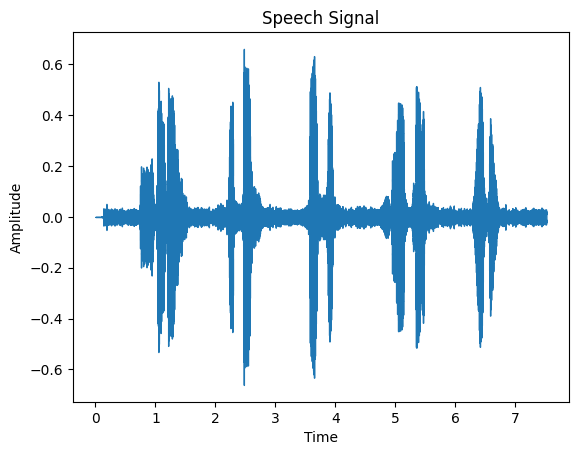

<ipython-input-15-b201d0554c0f>:10: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


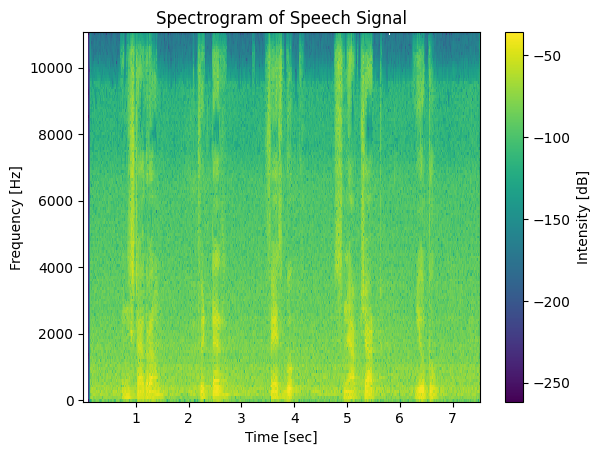

In [15]:
from scipy.signal import spectrogram

librosa.display.waveshow(y)
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

f, t, Sxx = spectrogram(y, sr)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Speech Signal')
plt.colorbar(label='Intensity [dB]')
plt.show()